**Importing Libraries**


In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

**Importing Dataframes**

In [2]:
#  creating a string of the path for .pkl file from main folder
path = r"C:/Users/Soni/7-7-23(Instacart Basket Analysis)"

In [3]:
#Importing pickel file
ords_prods_combined = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_ords_prods_combined.pkl'))

**Task 1:**

**Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data**

In [4]:
#Checking Imported Dataframe
ords_prods_combined.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
#ords_prods_combined = ords_prods_combined.rename(columns ={'order_dow' : 'order_day_of_week'})

In [6]:
#Checking Imported Dataframe size :
ords_prods_combined.shape

(32404859, 33)

In [7]:
#Checking Imported Dataframe variables information: :
ords_prods_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   order_dow               int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  item_price              float64 
 21  spendi

## Task 2: follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

**bar chart**

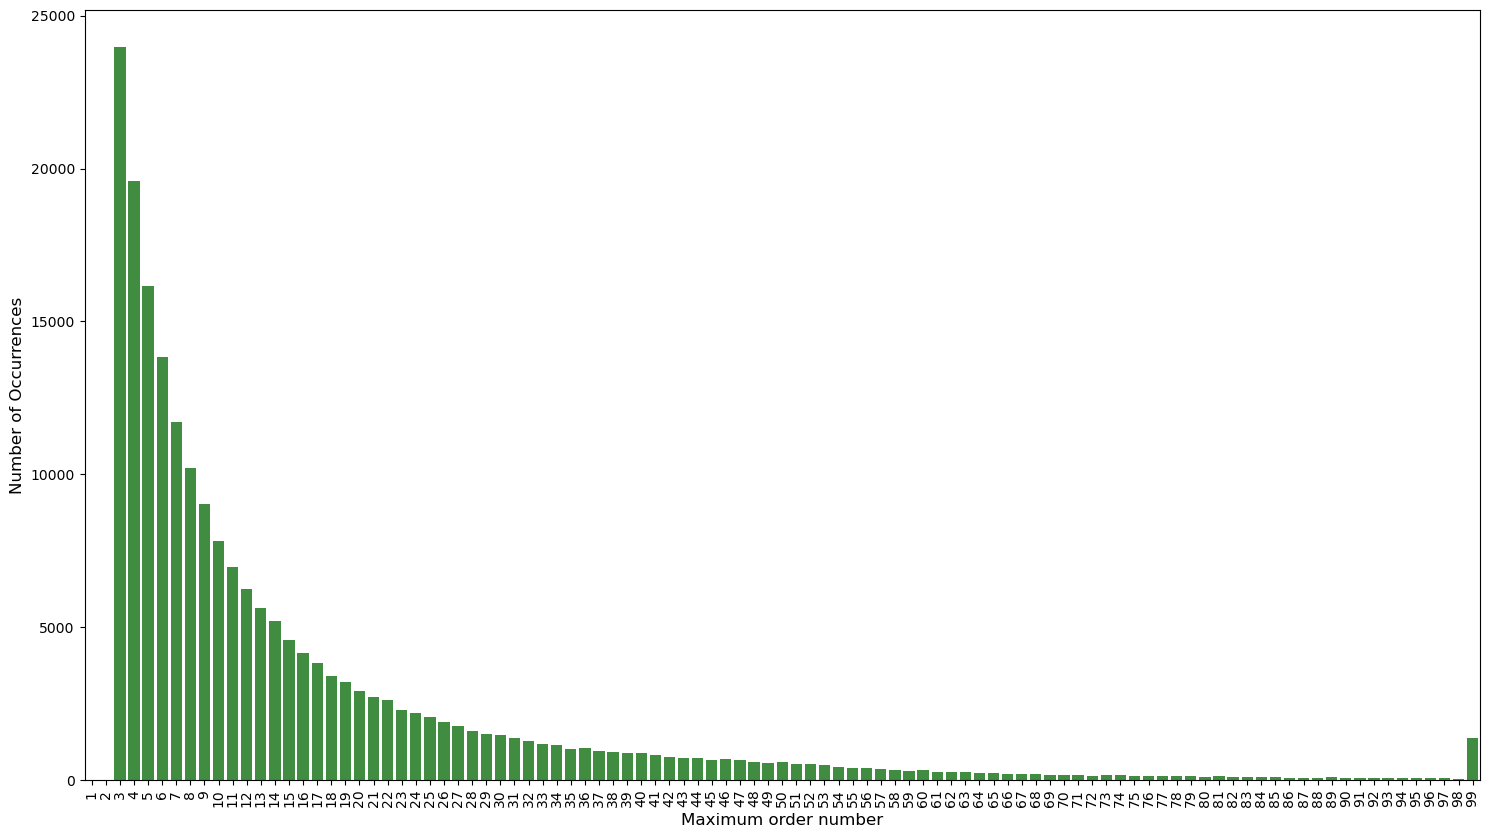

In [20]:
#checking the occurences of maximum order numbers
order_num = ords_prods_combined.groupby('user_id')['order_number'].agg(np.max).reset_index()
order_num = order_num['order_number'].value_counts()

plt.figure(figsize =(18,10))
sns.barplot(x = order_num.index, y = order_num.values, alpha = 0.8, color ='green')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
#7. Export Bar plot 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'plt_how_manytime_max_order.png'))
plt.show()

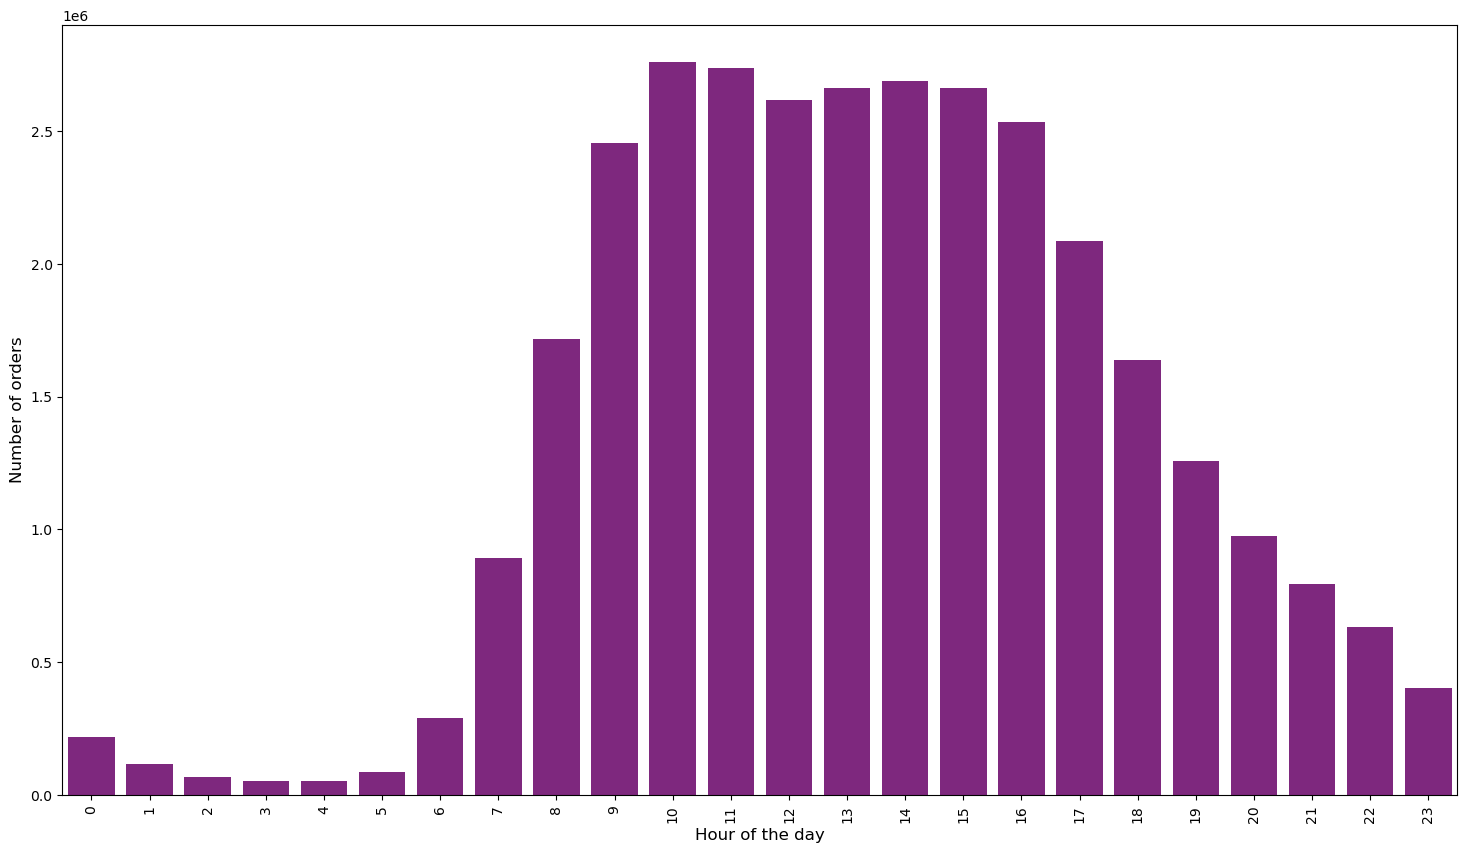

In [21]:
# Checking the orders by hour of the day
orders_hotd = ords_prods_combined['order_hour_of_day']

plt.figure(figsize=(18,10))
sns.countplot(x=orders_hotd, data=ords_prods_combined, alpha=0.9, color='purple')
plt.ylabel('Number of orders', fontsize=12)
plt.xlabel('Hour of the day', fontsize=12)
plt.xticks(rotation='vertical')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Number_oforder_hourly.png'))
plt.show()

In [ ]:
#Result:The number of orders quickly rises after 7AM and reach the maximum at 10AM, maintaining a high amount up to 5PM, where it starts to decrease.

In [48]:
#7. Export line chart of prices vs. order_day of_week
#plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Number_oforder_hourly.png'))

<Figure size 640x480 with 0 Axes>

**Now we can check the average amount of days between orders that the users take.**

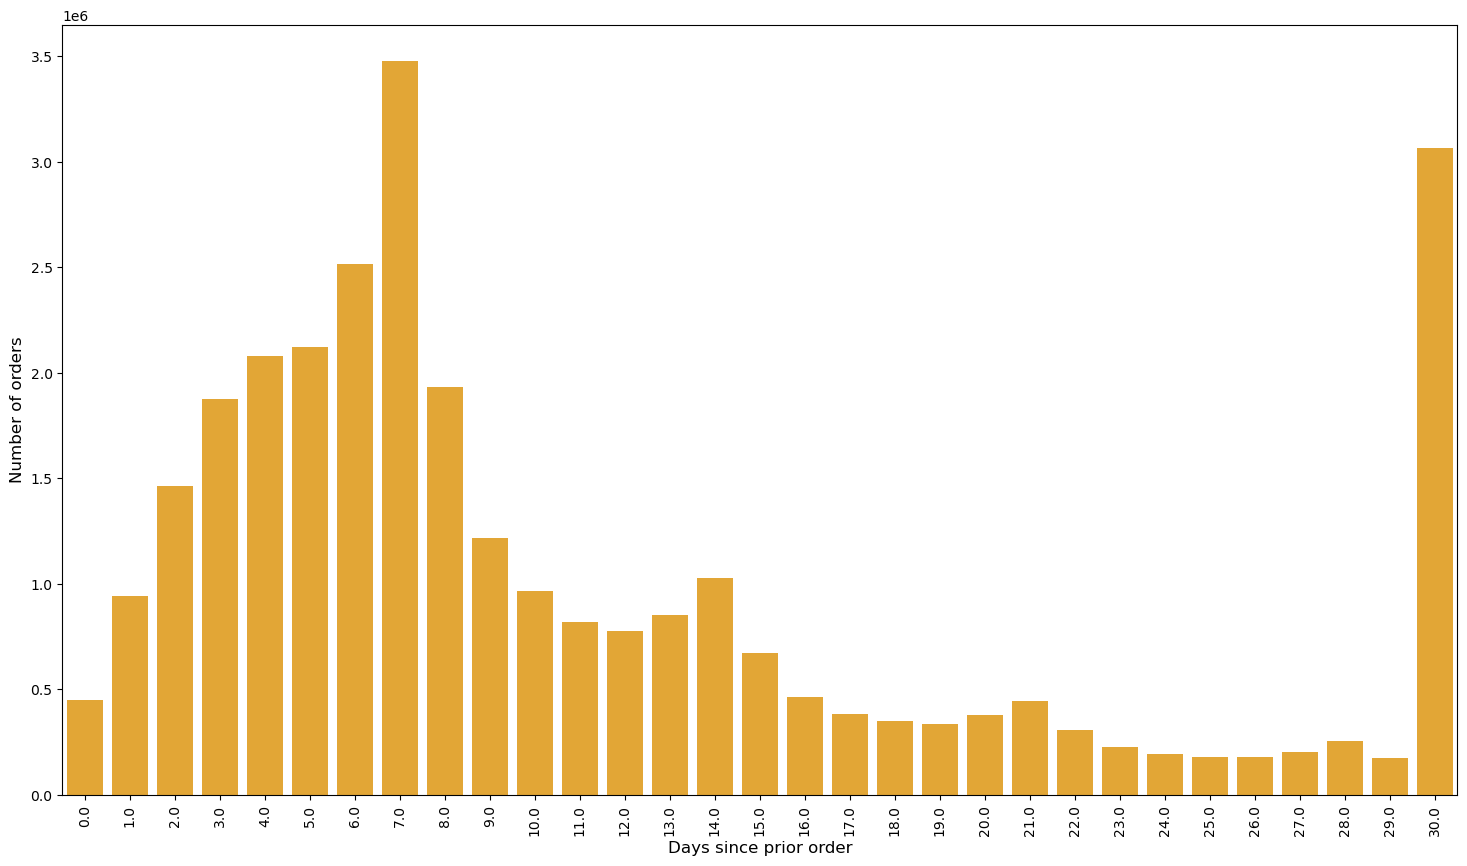

In [22]:
# Checking the amount of days since last order
orders_dspo = ords_prods_combined['days_since_prior_order']

plt.figure(figsize=(18,10))
sns.countplot(x=orders_dspo, data=ords_prods_combined, alpha=0.9, color='orange')
plt.ylabel('Number of orders', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Order_no_days_since prior_order.png'))
plt.show()

In [ ]:
#RESULT: We can see most of the orders are taken in monthly intervals, followed by weekly intervals, with peaks at 7, 14, 21 and 28 days.

In [50]:
#7. Export line chart of prices vs. order_day of_week
#plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Order_no_days_since prior_order.png'))

<Figure size 640x480 with 0 Axes>

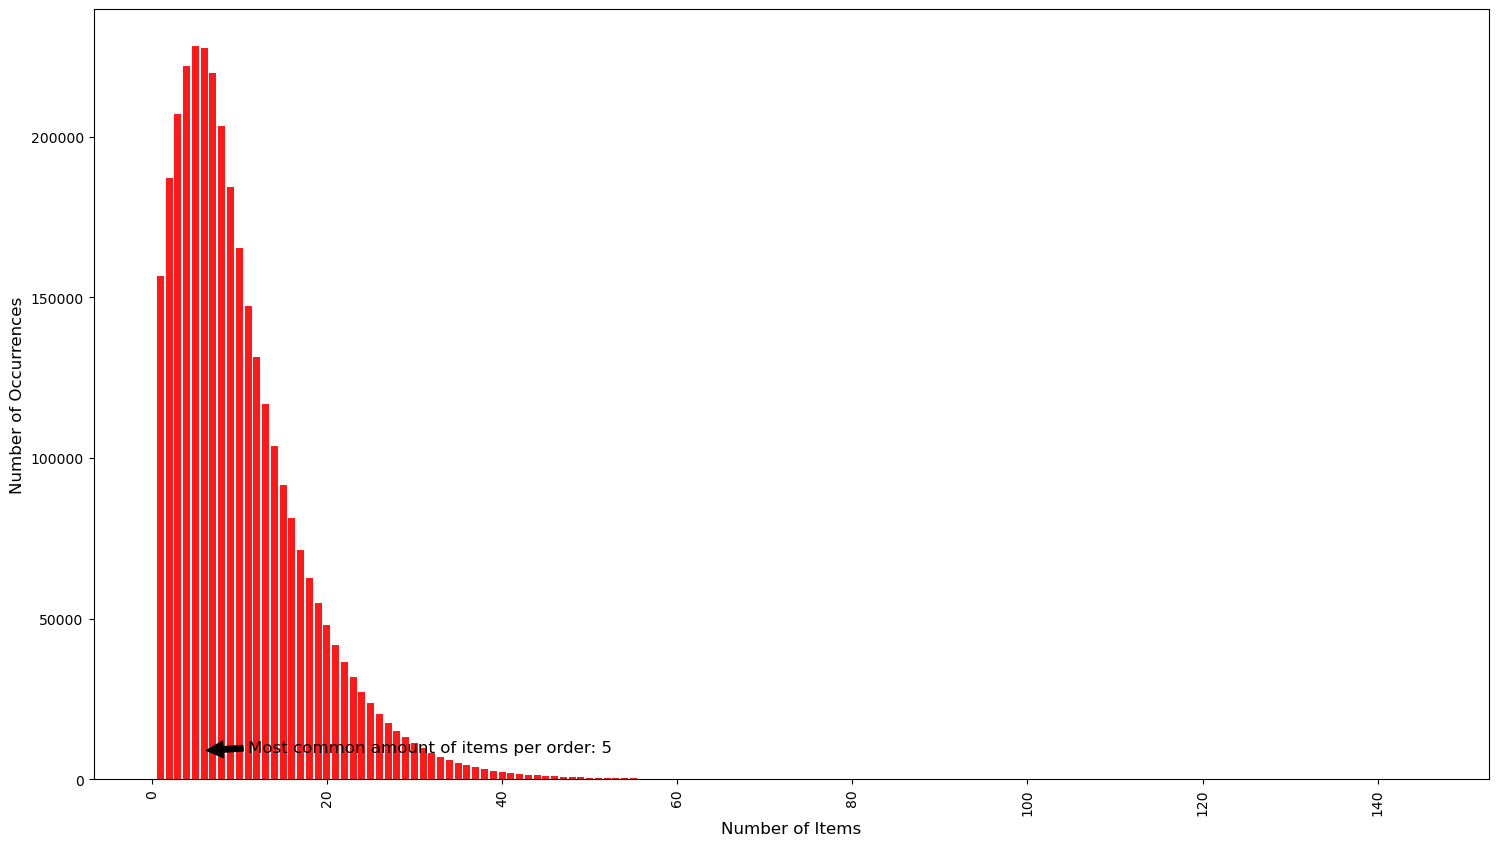

In [23]:
product_amount = ords_prods_combined.groupby('order_id')['add_to_cart_order'].aggregate(np.max).reset_index()
product_count = product_amount.add_to_cart_order.value_counts()

fig, ax = plt.subplots(figsize=(18,10))

ax.bar(x=product_count.index, height=product_count.values, alpha=0.9, color = 'red')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of Items', fontsize=12)
plt.xticks(rotation='vertical')
ax.annotate('Most common amount of items per order: {:.0f}'.format(product_count.idxmax()), xy=(6, 8900), xytext=(11, 8300), fontsize=12, arrowprops=dict(facecolor='black', shrink=0.05))
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'No_ofItems_howmany_times.png'))
plt.show()

In [ ]:
#RESULT: he most common order has an average of 5 items. With that in mind, lets check which items are the bestseller

In [52]:
#7. Export line chart of prices vs. order_day of_week
#plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'No_ofItems_howmany_times.png'))

<Figure size 640x480 with 0 Axes>

In [53]:
#Checking top 10
first_other_columns = ords_prods_combined[['product_name', 'product_id']].drop_duplicates(['product_id'], keep='first')
bestseller = ords_prods_combined.groupby('product_id')['add_to_cart_order'].count().sort_values(ascending=False).reset_index()
bestseller = pd.merge(bestseller, first_other_columns, on=['product_id'])

In [54]:
bestseller.head(10)

,product_id,add_to_cart_order,product_name
0,24852,472565,Banana
1,13176,379450,Bag of Organic Bananas
2,21137,264683,Organic Strawberries
3,21903,241921,Organic Baby Spinach
4,47209,213584,Organic Hass Avocado
5,47766,176815,Organic Avocado
6,47626,152657,Large Lemon
7,16797,142951,Strawberries
8,26209,140627,Limes
9,27845,137905,Organic Whole Milk


**Result: The top 9 bestsellers in prior orders are all produce items, with the top 1 being Banana, followed by Organic Whole Milk.**

In [55]:
#save this file
# Exporting Top 10 best seller producst list
bestseller.to_pickle(os.path.join(path, '02 data', 'Prepared Data', 'Top 10 bestseller_productslist.pkl'))

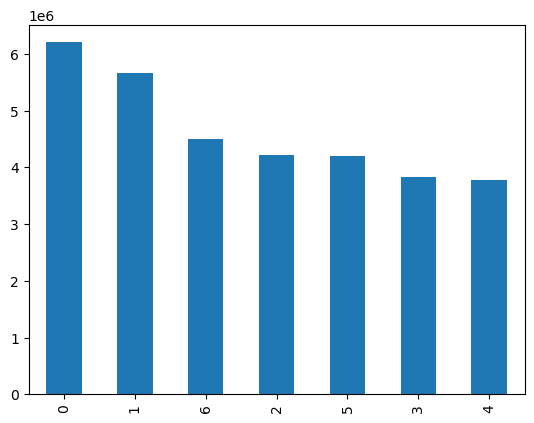

In [37]:
# plotting bar chart for this column: Busiest Day of Week:
bar_1 = ords_prods_combined['order_dow'].value_counts().plot.bar()

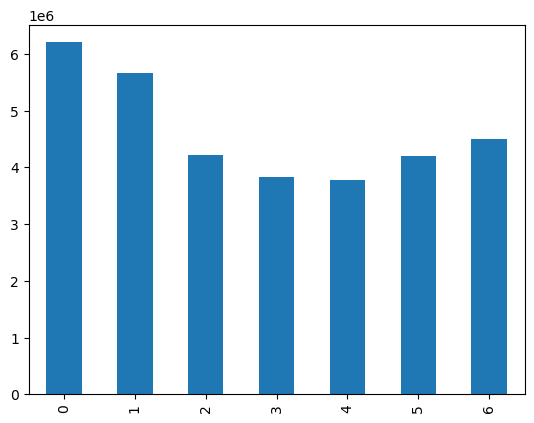

In [5]:
# plotting bar chart with sorting index()
bar_2 = ords_prods_combined['order_dow'].value_counts().sort_index().plot.bar()

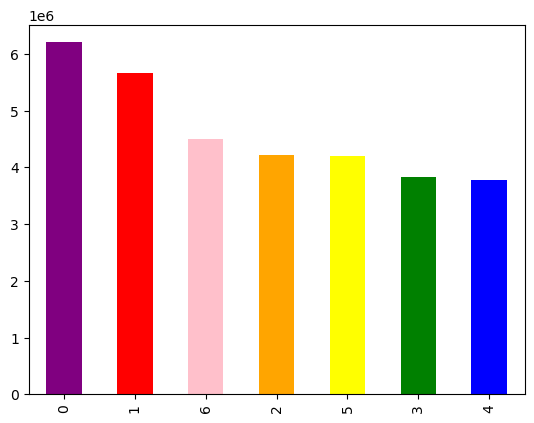

In [6]:
# plotting bar chart with colour bars:
bar_3 = ords_prods_combined['order_dow'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange','yellow', 'green', 'blue'])

**Histogram**

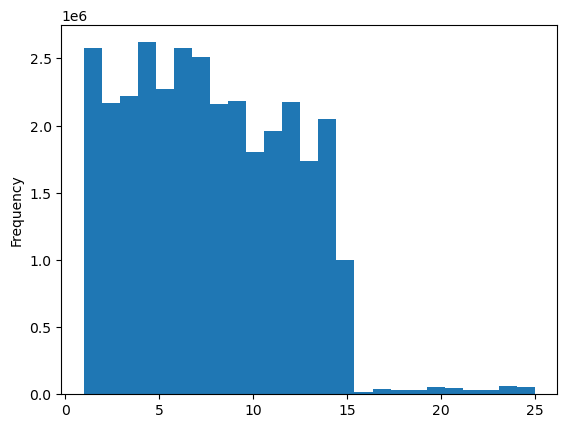

In [7]:
# Histogram for 'price' column with 25 bins:
hist_1 = ords_prods_combined['prices'].plot.hist(bins = 25)

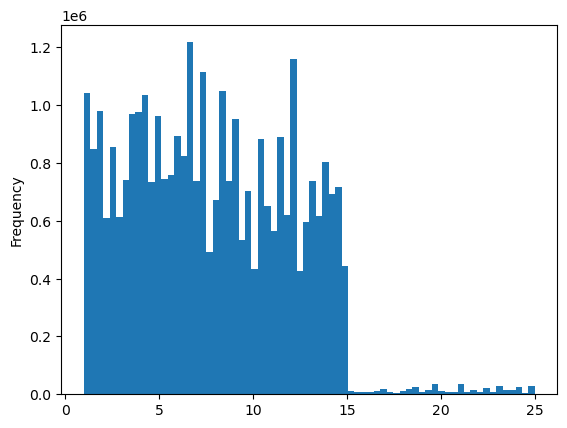

In [8]:
# Histogram for 'price' column with 70 bins:
hist_2 = ords_prods_combined['prices'].plot.hist(bins = 70)

**scatterplot**

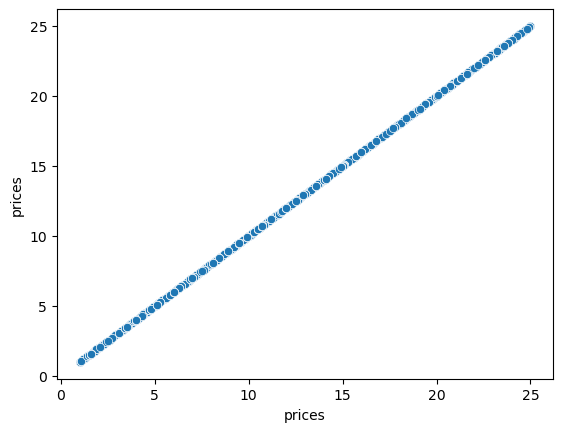

In [38]:
# scatterplot of the prices column:

scat = sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_combined)

**Line Graph**

In [10]:
# creating 70/30 sampling of Dataframe:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_combined)) <= 0.7

In [11]:
#list of randomized True and false values
dev

array([False,  True, False, ...,  True,  True,  True])

In [12]:
# Testing size of Array:
dev.shape

(32404859,)

In [13]:
# Sample of function:which produces a list of random numbers between 0 and 1.
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [14]:
# store the Dataframe in two samples, 70% big sample & 30% small sample
big = ords_prods_combined[dev]
small = ords_prods_combined[~dev]

In [15]:
# length of the two sample spaces
len(big) + len(small)

32404859

In [16]:
# creating one more Dataframe which contain only order_day_of_week and prices from the small sample space
df_2 = small[['order_dow', 'prices']]

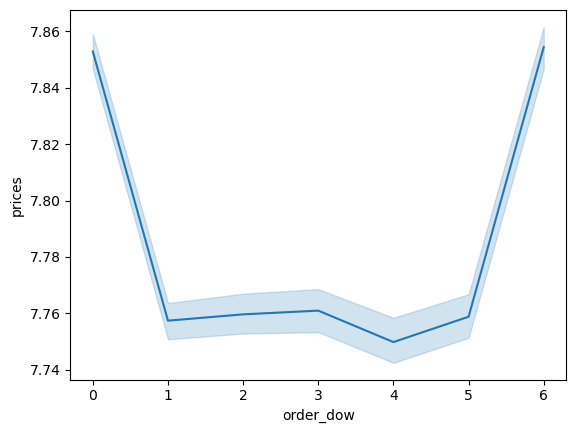

In [17]:
# creating line graph using the dataframe made of small sample space
line = sns.lineplot(data = df_2, x = 'order_dow', y= 'prices')

## Task 3: Provide Instacart senior stakeholder with descriptive findings about sales. 

**Create histogram of the ' order_hour_of_day' column**

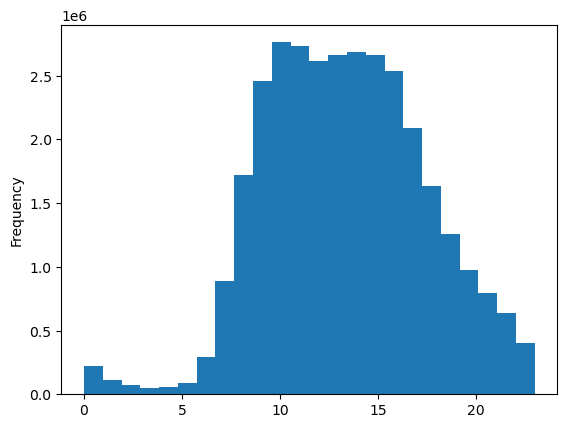

In [18]:
# Histogram for order_hour_of_day_column with 24 bins because there are only 24 hours in a day
hist_3 = ords_prods_combined['order_hour_of_day'].plot.hist(bins = 24)

## Task 4: The marketing Team curious about the distribution of orders among customers in term of loyalty. Create a bar chart from the 'loyalty_flag' column
    

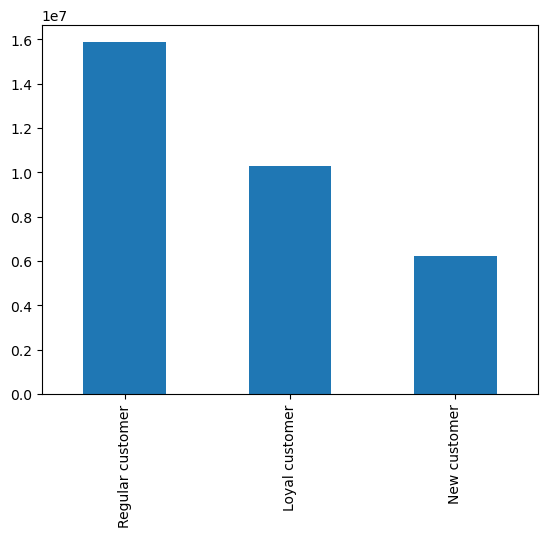

In [19]:
bar_4 = ords_prods_combined['loyalty_flag'].value_counts().plot.bar()

## Task 5: Check wheather there is difference in expenditure( the 'prices' column) depending on the hour of the day.

In [20]:
# creating one more Dataframe which contain only order_hour_of_day and prices from the small sample space
#depend belongs to y axis.
df_line_3 = small[['order_hour_of_day', 'prices']]

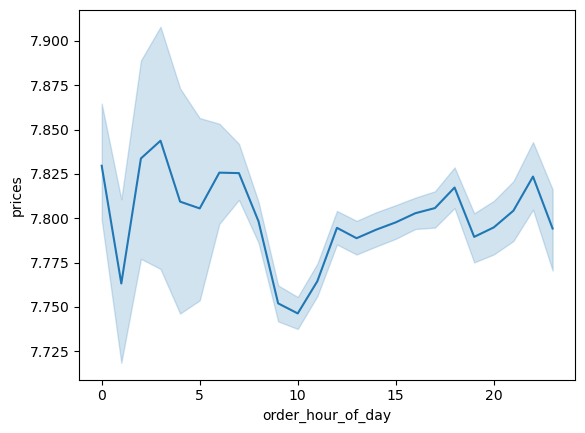

In [21]:
# creating line graph using the dataframe made of small sample space
line_2 = sns.lineplot(data = df_line_3, x = 'order_hour_of_day', y= 'prices')

## Task 6: Now that you have information about customers, you need to conduct some exploratory analysis of customers demographics to inform the targeted marketing campaigns. First, determine whether there's connection between age and family situation by creating a line chart exploring the connections between age and number of dependents.

In [22]:
# creating one more Dataframe which contain only order_day_of_week and prices from the small sample space
df_line_2 = small[['Age', 'n_dependants']]

**Creating a line graph:**

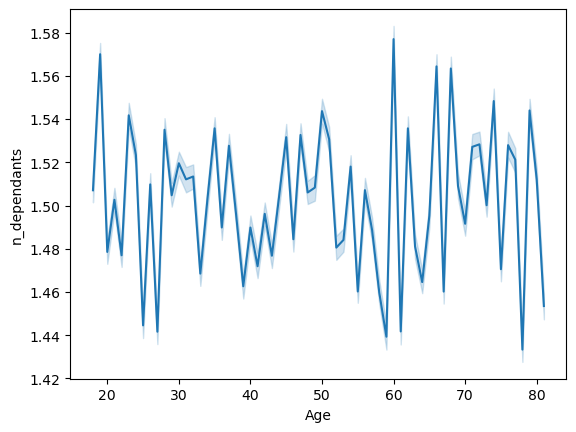

In [23]:
# creating line graph using the dataframe made of small sample space
line_3 = sns.lineplot(data = df_line_2, x = 'Age', y= 'n_dependants')

**Observation: There is not good relationship between age and dependants. At age 20 people are dependents and try to settle and make family but in age 40 they are independent and they have family and dependents so it seems there is more shopping as compared to other age group. There is one more spike in line at age group 60 which is showing this age they are settles and may be kids are helping parents with some shopping but all over there is not any clear relationship between age and dependents. if line chart would be linear upward then it would be good relationship and if line goes doward then there is bad relationship but there is zig zag relationship which is not so clear.**

## Task 7: You will need to explore whether there's connection between age and spending power(income).To visualize this relationship, create a scatterplot using the sns.scatterplot() function

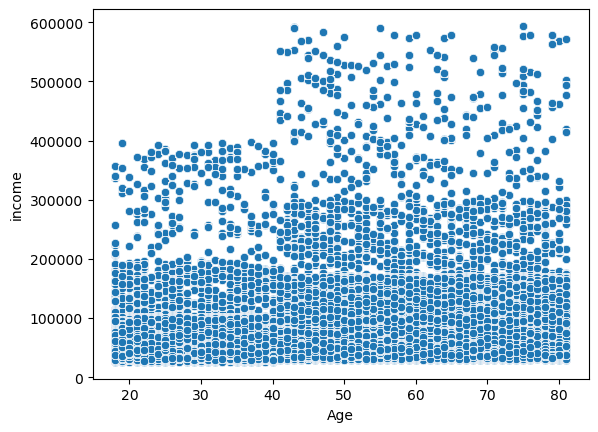

In [24]:
# scatterplot of the prices column:
scat_2 = sns.scatterplot(x = 'Age', y = 'income', data = ords_prods_combined)

**Result of scatterplot: It represent understandable relationship between age and income.As we can see in scatterplot age vs.income. Age between 20-40 years, income around 200k then age between 40 to 70 showing stable income between 200k-400k but frequency of income less around 500k.**

## Task 8: Export your visualization as ".png" files in your relevant project folder 

In [25]:
#1. Export bar chart for order_day_of_week column
bar_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

In [26]:
#2. Export bar chart according to index column
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow_index.png'))

In [27]:
#3. Export bar chart according to colour bar 
bar_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow_color.png'))

In [28]:
#4. Export Histogram for prices column with 25 bins
hist_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices_25.png'))

In [29]:
#5. Export Histogram for prices column with 70 bins
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices_70.png'))

In [30]:
#6. export scatterplot of price column
scat.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_prices.png'))

In [31]:
#7. Export line chart of prices vs. order_day of_week
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_price_dow.png'))

In [32]:
#8. Export Histogram for order_hour_of_day column
hist_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day.png'))

In [33]:
#9. Export bar chart to measure loyalty Frequency
bar_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_freq.png'))

In [34]:
#10. Export line chart to determine expenditure difference between price order_hour_of_day and prices
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_price_order_hour_of_day.png'))

In [35]:
#9. Export connection between age and no of dependants
line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependents.png'))

In [36]:
#10. Export scatterplot to determine connection between age and income
scat_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_age_income.png'))